In [17]:
import numpy as np
from math import sqrt
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from evaluacion_funciones import *

In [19]:
evaluacion

<function evaluacion_funciones.evaluacion(y_true, y_pred, metricas)>

In [20]:
# Carga de datos.
datos = datasets.load_boston()

In [21]:
# Algoritmos de aprendizaje.
k = 10
reg = KNeighborsRegressor(n_neighbors = k)

In [22]:
# Métricas de evaluación.
metricas = {
  'MAE': metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2': metrics.r2_score}

In [23]:
# Validación y obtención de las predicciones del modelo.
seed = 1
y_pred = cross_val_predict(reg, datos.data, datos.target,
           cv = KFold(n_splits=10, random_state=seed))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [24]:
y_pred

array([22.81, 23.24, 21.58, 23.09, 21.77, 23.18, 23.72, 22.32, 23.54,
       27.12, 24.93, 22.62, 23.56, 22.63, 31.44, 23.75, 27.5 , 27.38,
       24.84, 24.88, 27.33, 22.32, 22.32, 24.54, 22.32, 30.1 , 31.44,
       30.1 , 26.45, 31.44, 31.52, 28.19, 20.09, 34.18, 21.37, 25.06,
       23.51, 25.24, 26.68, 33.94, 33.94, 24.77, 24.77, 24.77, 21.48,
       20.93, 21.4 , 26.07, 25.19, 21.6 , 25.84, 29.88, 26.39, 25.97,
       31.11, 40.19, 25.23, 37.64, 25.56, 25.3 , 28.63, 36.17, 28.63,
       25.89, 30.22, 26.8 , 26.38, 27.11, 24.32, 26.43, 27.82, 27.62,
       28.3 , 27.44, 25.67, 20.11, 28.54, 20.11, 20.11, 20.36, 26.39,
       31.78, 24.3 , 25.91, 21.21, 23.82, 21.41, 23.82, 21.46, 21.39,
       21.08, 21.24, 31.67, 31.14, 37.68, 25.41, 20.49, 21.4 , 24.06,
       21.78, 19.22, 19.68, 18.5 , 27.02, 27.02, 27.02, 27.02, 24.02,
       27.02, 27.02, 21.29, 28.15, 31.68, 31.68, 34.06, 29.43, 28.74,
       31.18, 26.41, 20.12, 35.35, 36.8 , 35.16, 32.06, 32.06, 35.16,
       32.06, 34.06,

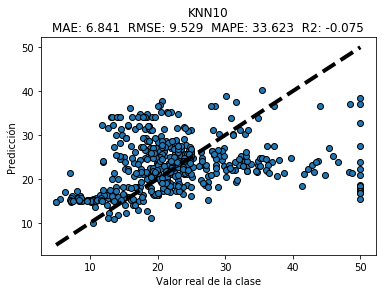

In [28]:
# Evaluación y presentación de resultados.
evalu = evaluacion(datos.target, y_pred, metricas)
grafica_real_vs_pred(datos.target, y_pred, evalu, "KNN"+str(k))